In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1672.jpg
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1296.jpg
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1738.jpg
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1811.jpg
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2314.jpg
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2095.jpg
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1892.jpg
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2313.jpg
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1749.jpg
/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2191.jpg
/content/

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#img_shape=(128,128,3)
image_gen =ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

In [ ]:
train = image_gen.flow_from_directory('/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train',batch_size = 32, target_size = (224,224),
                                     subset = 'training',shuffle = True)

Found 4098 images belonging to 4 classes.


In [ ]:
valid = image_gen.flow_from_directory('/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/train',batch_size = 32, target_size = (224,224),subset = 'validation',shuffle = True)

Found 1023 images belonging to 4 classes.


In [ ]:
test=image_gen.flow_from_directory('/content/drive/MyDrive/Alzheimer Dataset/Alzheimer_s Dataset/test', target_size = (224,224), batch_size = 32 ,shuffle = True)

Found 1279 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet121

In [ ]:
densenet= DenseNet121(input_shape=(224,224,3),include_top=False,weights="imagenet")

In [ ]:
for layers in densenet.layers:
    layers.trainable=False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from keras import layers
modeldense=Sequential()
modeldense.add(densenet)
modeldense.add(Dropout(0.5))
modeldense.add(Flatten())
modeldense.add(BatchNormalization())
modeldense.add(Dense(64,kernel_initializer='he_uniform'))
modeldense.add(BatchNormalization())
modeldense.add(Activation('relu'))
modeldense.add(Dropout(0.5))
modeldense.add(Dense(64,kernel_initializer='he_uniform'))
modeldense.add(BatchNormalization())
modeldense.add(Activation('relu'))
modeldense.add(Dropout(0.5))
modeldense.add(Dense(64,kernel_initializer='he_uniform'))
modeldense.add(BatchNormalization())
modeldense.add(Activation('relu'))
modeldense.add(Dropout(0.5))
modeldense.add(Dense(32,kernel_initializer='he_uniform'))
modeldense.add(BatchNormalization())
modeldense.add(Activation('relu'))
modeldense.add(Dropout(0.5))
modeldense.add(Dense(32,kernel_initializer='he_uniform'))
modeldense.add(BatchNormalization())
modeldense.add(Activation('relu'))
modeldense.add(Dense(4,activation='softmax'))

In [ ]:
modeldense.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1024)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50176)             200704    
_________________________________________________________________
dense (Dense)                (None, 64)                3211328   
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        #f1_score,
]

In [ ]:
modeldense.compile(optimizer="adam",loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history=modeldense.fit(train,validation_data=valid,epochs=20)

Epoch 1/20
129/129 [==============================] - 70s 480ms/step - loss: 1.6180 - accuracy: 0.7072 - precision: 0.2115 - recall: 0.0602 - auc: 0.5048 - val_loss: 1.2201 - val_accuracy: 0.7495 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7489
Epoch 2/20
129/129 [==============================] - 58s 453ms/step - loss: 1.1734 - accuracy: 0.7453 - precision: 0.4778 - recall: 0.2030 - auc: 0.7466 - val_loss: 1.1106 - val_accuracy: 0.7517 - val_precision: 0.6061 - val_recall: 0.0196 - val_auc: 0.7779
Epoch 3/20
129/129 [==============================] - 58s 453ms/step - loss: 1.0869 - accuracy: 0.7521 - precision: 0.5081 - recall: 0.2559 - auc: 0.7736 - val_loss: 1.0714 - val_accuracy: 0.7515 - val_precision: 0.5938 - val_recall: 0.0186 - val_auc: 0.7855
Epoch 4/20
129/129 [==============================] - 59s 455ms/step - loss: 1.0720 - accuracy: 0.7499 - precision: 0.4997 - recall: 0.2457 - auc: 0.7759 - val_loss: 1.0518 - val_accuracy: 0.7534 - val_precision: 0.

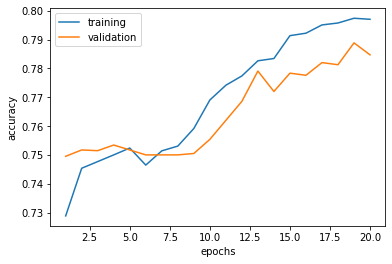

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['training', 'validation'])

In [ ]:
scores = modeldense.evaluate_generator(test)

In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])

Accuracy =  0.7967162132263184
Precision =  0.8292011022567749
Recall =  0.23534010350704193
AUC =  0.8381829857826233
